In [51]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [52]:
# Load the dataset
advertising_dataset_path = 'data/advertising.csv'
# Replace dataset_path with the actual path to the dataset
df = pd.read_csv(advertising_dataset_path)
df 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data cleaning

In [53]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

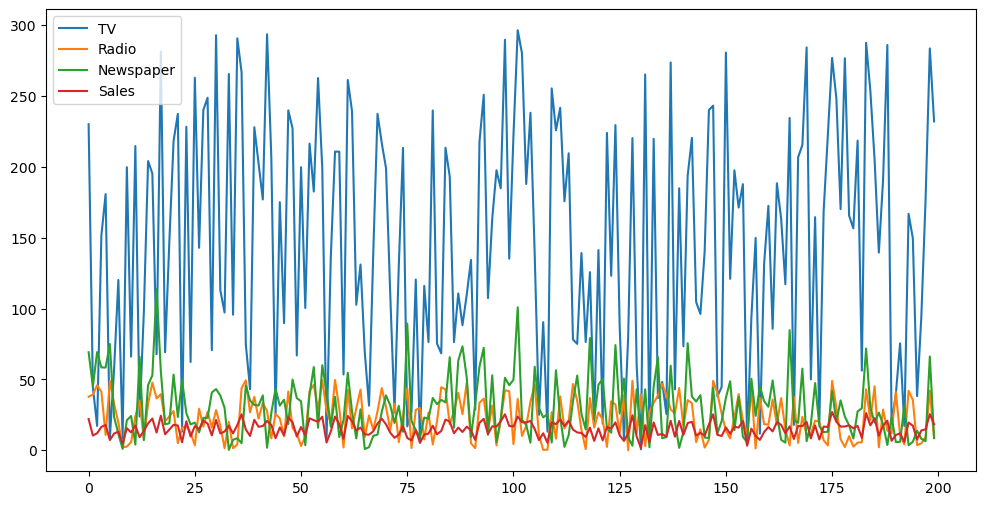

In [54]:
# Visualize data with line plot
df.plot(figsize=[12,6])
plt.show()

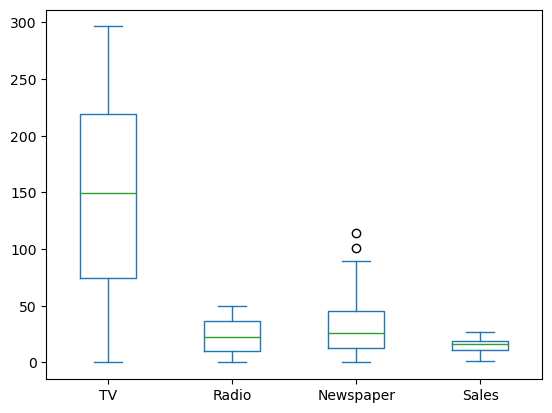

In [55]:
# Outlier Analysis
df.plot.box()
plt.show()

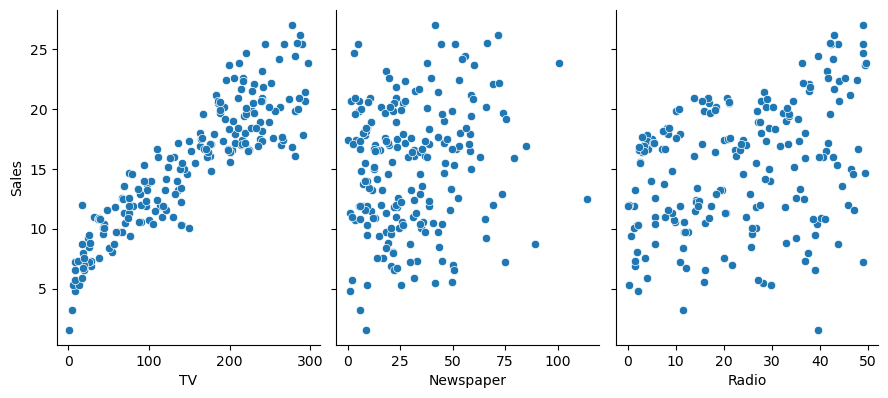

In [57]:
# Plot sales against each of the other three data fields
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=.75, kind='scatter')
plt.show()

# Use scikit-learn to build a linear regression model

### The function train_test_split() takes several arguments:

### arrays: The input arrays (e.g., features and labels) to be split. Typically, this includes your X (feature/input) array and y (target/output) array.
### test_size: The proportion of the dataset to include in the testing split. It can be specified as a float value between 0 and 1 (representing the fraction of the dataset) or as an integer (representing the absolute number of samples).
### train_size: The proportion of the dataset to include in the training split. It has the same usage as test_size and is an alternative way to specify the training split size. If both train_size and test_size are provided, train_size will take precedence.
### random_state: An optional random seed value to ensure reproducibility of the split. By setting a fixed random seed, the same split can be obtained every time the code is executed.
### shuffle: A boolean value indicating whether to shuffle the data before splitting. The default value is True, which shuffles the data randomly. If you want to keep the data order, you can set it to False.
### stratify: An optional array or label indicating stratification. When the stratify parameter is used, the splitting preserves the proportion of samples in the different classes or groups.

In [41]:
# Prepare the input features and target variable
X = df[['TV', 'Radio', 'Newspaper']] 
y = df['Sales'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [42]:
X_train

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [43]:
X_test.head(5)

,TV,Radio,Newspaper
126,7.8,38.9,50.6
104,238.2,34.3,5.3
99,135.2,41.7,45.9
92,217.7,33.5,59.0
111,241.7,38.0,23.2


In [44]:
y_train

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 160, dtype: float64

In [45]:
y_test.head(5)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [33]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)